In [28]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from scipy import misc

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Running a unix-like command
from subprocess import check_output

folder = 'RWIS331ptrain'

print(check_output(["ls", folder]).decode("utf8"))

CR-01
CR-04
CR-09
CR-19
CR-26
ER-02
ER-08
ER-09
ER-12
ER-14
ER-17
ER-20
ER-26
ER-32
NER-13
NER-15
NER-39
NER-40
NER-45
NWR-06
NWR-09
NWR-14
NWR-25
NWR-26
WR-05
WR-06
WR-13
WR-21
WR-25
WR-29
WR-32
WR-33



In [29]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import re

In [30]:
'''
    For the given path, get the List of all files in the directory tree 
'''
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            if '.jpg' in fullPath :
            #if ( '.jpg' in fullPath and 'CR-' in fullPath) :
                allFiles.append(fullPath)
                
    return allFiles

In [31]:
# import images from folder

onlyfiles = getListOfFiles(folder)

# list of filenames in the folder
#onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print(len(onlyfiles))
#print(onlyfiles)

11200


Working with 11200 images
Image examples: 
RWIS331ptrain/CR-01/C1/CR-QEW_near_Con_Rd-p1-1512129600.jpg


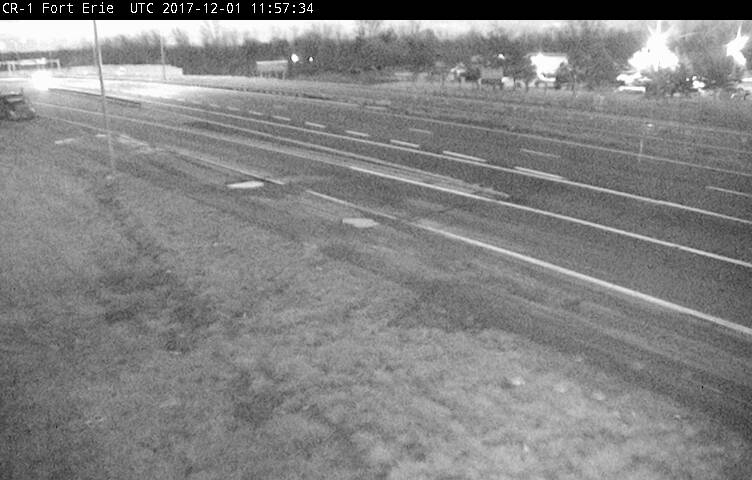

RWIS331ptrain/CR-01/C1/CR-QEW_near_Con_Rd-p1-1512131400.jpg


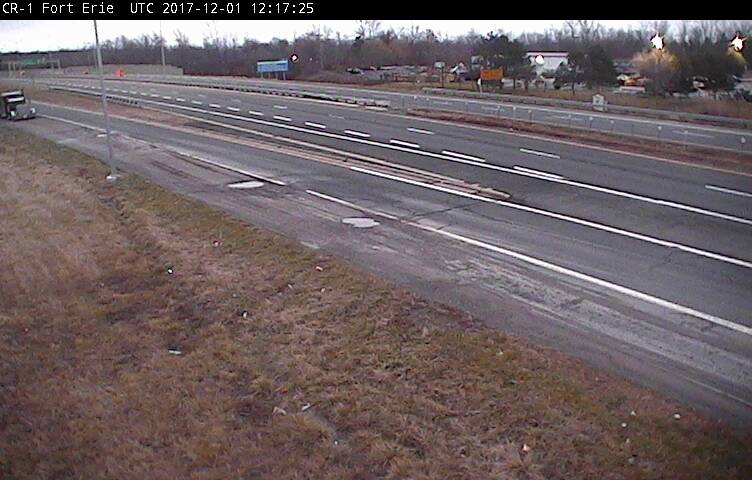

In [32]:
print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

# display some images
for i in range(0, 2):
    print(onlyfiles[i])
    display(_Imgdis(filename=onlyfiles[i], width=240, height=320))

In [41]:
import imageio
#im = imageio.imread('imageio:chelsea.png')
im = imageio.imread(onlyfiles[0])
print(im.shape)
print(type(im))

np_myarray = np.ndarray(shape=(3,331, 331, 3), dtype=np.float16)

np_myarray[0] = im

print(np_myarray.shape)
print(type(np_myarray))


#img_arr = misc.imread(onlyfiles[0])

(331, 331, 3)
<class 'imageio.core.util.Array'>
(3, 331, 331, 3)
<class 'numpy.ndarray'>


In [33]:
# Square crop and resize all the images

target_height = 331
target_width = 331
i = 0
completion = 10

for ifile in onlyfiles:

    # From filename to numpy array
    img_arr = misc.imread(ifile)

    # Determining original size
    orig_heigh = img_arr.shape[0]
    orig_width = img_arr.shape[1]

    # Remove 4% of image at the top (printed metadata on the image)
    sub1 = img_arr[(int(orig_heigh*0.04)):,:,:]

    # Determining new size
    sub1_heigh = sub1.shape[0]
    sub1_width = sub1.shape[1]

    # Slicing the array to square crop
    hor_center = (sub1_width // 2)
    left_cut = hor_center - (sub1_heigh // 2)
    right_cut = hor_center + (sub1_heigh // 2)
    sub2 = sub1[:,left_cut:right_cut,:]
    #print(crop_arr.shape)

    # From numpy array to image
    misc.imsave('cropped.png', sub2) # uses the Image module (PIL)
    # Preview cropped image

    # Resize square image
    img_sq = Image.open('cropped.png')
    size = target_height, target_width
    img_sq.thumbnail(size,Image.ANTIALIAS)
    img_sq.save('resized', 'png')

    # Overwrite original image
    img_sq.save(ifile, 'jpeg')

    i += 1
    # Print % of completion
    if (i+1) % (len(onlyfiles)//10) == 0:
        print('Completed ' + str(completion) + '%')
        completion += 10

/home/juan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/juan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Completed 10%
Completed 20%
Completed 30%
Completed 40%
Completed 50%
Completed 60%
Completed 70%
Completed 80%
Completed 90%
Completed 100%


In [34]:
cat1 = 0
cat2 = 0
cat3 = 0

for ifile in onlyfiles:
    if 'C1' in ifile:
        cat1 += 1
    elif 'C2' in ifile:
        cat2 += 1
    elif 'C3' in ifile:
        cat3 += 1

total = cat1+cat2+cat3
print ('Total: ' + str(total) + '\n')
print ('Cat 1: ' + str(cat1) + ' Approx. ' + str(int(cat1/total*100)) + '%\n')
print ('Cat 2: ' + str(cat2) + ' Approx. ' + str(int(cat2/total*100)) + '%\n')
print ('Cat 3: ' + str(cat3) + ' Approx. ' + str(int(cat3/total*100)) + '%\n')


Total: 11200

Cat 1: 5059 Approx. 45%

Cat 2: 4657 Approx. 41%

Cat 3: 1484 Approx. 13%



In [ ]:
station = 'initial'
cat1 = 0
cat2 = 0
cat3 = 0
pattern = '/[A-Z]+-[0-9]+/'

f = open('rwis_stations.txt','w',encoding='utf8')

for ifile in onlyfiles:
    this_station = re.findall(pattern, ifile)[0][1:-1]
    
    if this_station != station:
        
        if station == 'initial':
            print('station,cat1,cat2,cat3\n')
            f.write('station,cat1,cat2,cat3\n')
        else:
            print(station + ',' + str(cat1) + ',' + str(cat2) + ',' + str(cat3) + '\n')
            f.write(station + ',' + str(cat1) + ',' + str(cat2) + ',' + str(cat3) + '\n')
        
        station = this_station
        cat1 = 0
        cat2 = 0
        cat3 = 0
    
    if 'C1' in ifile:
        cat1 += 1
    elif 'C2' in ifile:
        cat2 += 1
    elif 'C3' in ifile:
        cat3 += 1

# Print and write those of the last station
print(station + ',' + str(cat1) + ',' + str(cat2) + ',' + str(cat3) + '\n')
f.write(station + ',' + str(cat1) + ',' + str(cat2) + ',' + str(cat3) + '\n')

f.close()